# <span style="color: red;">Установка пакетов</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# <span style="color: red;">Чтение осциллограммы сигнала из *.csv файла</span>

In [6]:
# format_ver = 0
# # file_name = "../data/6кГц/F0004CH1.CSV"  # 1389
# # file_name = "../data/9кГц/F0003CH1.CSV"  # 1390
# # file_name = "../data/12кГц/F0002CH1.CSV" # 1387
# # dds_file = "../ZI/01387.dds"
# # file_name = "../data/15кГц/F0001CH1.CSV"  # 1391
# file_name = "../data/24кГц/F0000CH1.CSV"
# dds_file = "../ZI/01392.dds"
# downsampling_factor = 1
# inx_start = 1
# inx_stop = 2450


# данные записанные давно (апрель 2018 года)
format_ver = 1

# file_name = "../data/old_data/Newfile5.csv"  # 6кГц
# inx_start = 000_001  
# inx_stop = 1_400_000

# file_name = "../data/old_data/Newfile2.csv"  # 9 кГц
# inx_start = 180_000
# inx_stop = 1_080_000

# file_name = "../data/old_data/Newfile1.csv"   # 12 кГц
# inx_start = 350_000
# inx_stop = 1_050_000

# file_name = "../data/old_data/Newfile4.csv" # 15кГц
# inx_start = 350_000
# inx_stop = 950_000

# file_name = "../data/old_data/Newfile3.csv" # 24 кГц
# inx_start = 491_000
# inx_stop = 900_000
# dds_file = "../ZI/01392.dds"

# file_name = "../data/new_data/Newfile1_CH2.csv" # 10 кГц
# inx_start = 580_000
# inx_stop = 1030_000

# file_name = "../data/new_data/Newfile3.csv" # 10 кГц
# inx_start = 50_000
# inx_stop = 950_000

# file_name = "../data/new_data/Newfile3_CH2.csv" # 10 кГц
# inx_start = 400_000
# inx_stop = 790_000

# file_name = "../data/new_data/Newfile5_CH2.csv" # 20 кГц 5Vpp
# inx_start = 1_200_000
# inx_stop = 2_050_000

# file_name = "../data/new_data/Newfile6_CH2.csv" # 20 кГц 10Vpp
# inx_start = 450_000
# inx_stop = 1_270_000

file_name = "../data/new_data/Newfile7_CH2.csv" # 20 кГц 20Vpp
inx_start = 420_000
inx_stop = 1_250_000

# коэффициент понижения частоты дискретизации
downsampling_factor = 100;





from load_and_prepare_data import load_and_prepare_data

t, s, meta_info, meta_df, dt, oversampling_factor, N = load_and_prepare_data(
    file_name, format_ver, inx_start, inx_stop, downsampling_factor
)

Считано 1400000 отсчётов
Частота дискретизации = 2000  МГц
         Key          Value
0          X       Sequence
1        CH2           Volt
2      Start  -3.300000e-05
3  Increment   5.000000e-10
Для анализа берём 65536 отсчётов

Частота дискретизации (новая) = 20  МГц



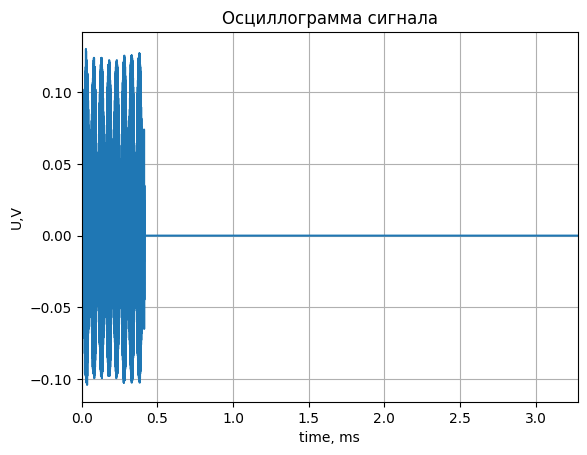

In [7]:
import numpy as np

t_ms = np.array(t) * 1000
s_arr = np.array(s)

plt.figure()
plt.plot(t_ms, s_arr)
plt.xlabel("time, ms")
plt.ylabel("U,V")
plt.title("Осциллограмма сигнала")
plt.grid(True)
plt.xlim(0, t_ms[-1])
plt.show()

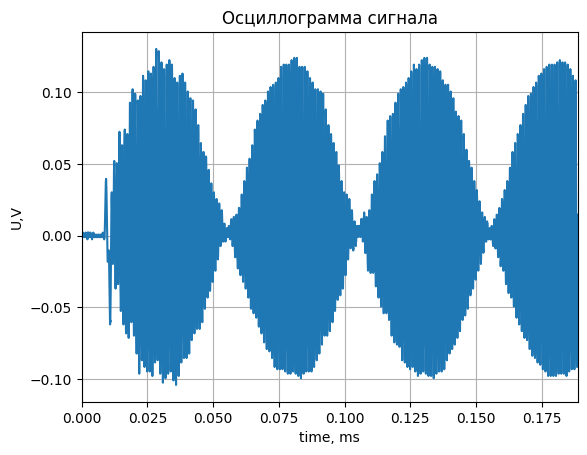

In [8]:
plt.figure()
plt.plot(t_ms, s_arr)
plt.xlabel("time, ms")
plt.ylabel("U,V")
plt.title("Осциллограмма сигнала")
plt.grid(True)
plt.xlim(0, t_ms[-1] / oversampling_factor / 2.2)
plt.show()

# <span style="color: red;">Спектральный анализ</span>

## <span style="color: red;">БПФ (fft)</span>

Применим к сигналу функцию fft(). В результает получем комплексный вектор, который содержит информацию как об амплитуде спектральных составляющих сигнала, так и о фазе.

In [9]:
from fft_signal import fft_signal

fft_s, nsamp, fs, df, freq_vec = fft_signal(s, t);

Частота дискретизации = 20  МГц
Разрешение по частоте = 305  Гц


строи спектр сигнала (fft)

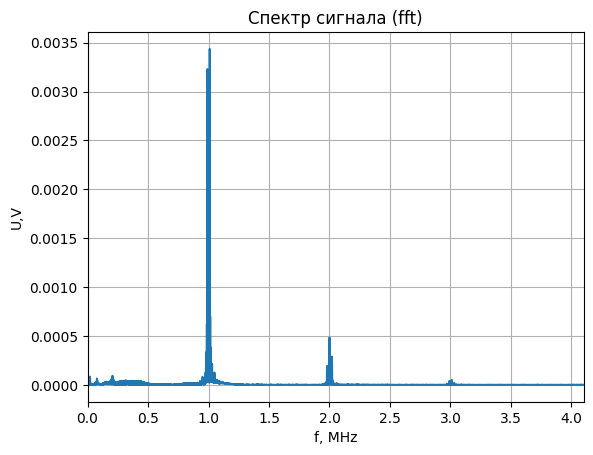

In [10]:
plt.figure()
plt.plot(freq_vec / 1e6, np.abs(fft_s))
plt.xlabel("f, MHz")
plt.ylabel("U,V")
plt.title("Спектр сигнала (fft)")
plt.xlim(0, 4.1)
plt.grid(True)
plt.show()

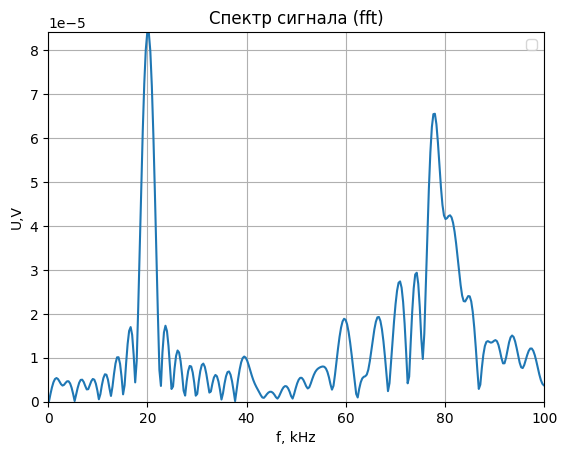

In [11]:
inds = np.where((freq_vec >= 0) & (freq_vec <= 100_000))[0]
max_y = np.max(np.abs(fft_s[inds]))

plt.figure()
plt.plot(freq_vec / 1e3, np.abs(fft_s))
plt.xlabel("f, kHz")
plt.ylabel("U,V")
plt.title("Спектр сигнала (fft)")
plt.legend([])
plt.xlim(0, 100)
plt.ylim(0, max_y)
plt.grid(True)
plt.show()

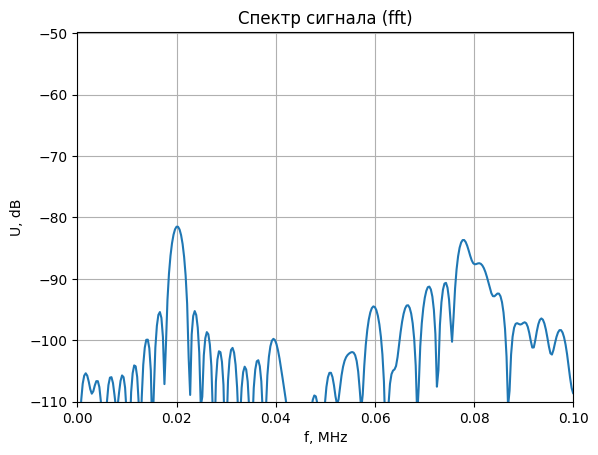

In [13]:
inds = np.where((freq_vec >= 0) & (freq_vec <= 1e6))[0]
max_y = np.max(10 * np.log10(np.abs(fft_s[inds]) ** 2))

plt.figure()
plt.plot(freq_vec / 1e6, 10 * np.log10(np.abs(fft_s) ** 2))
plt.xlabel("f, MHz")
plt.ylabel("U, dB")
plt.title("Спектр сигнала (fft)")
plt.xlim(0, 0.1)
plt.ylim(-110, max_y)
plt.grid(True)
plt.show()

## <span style="color: red;">Периодограмма</span>

**Периодограмма** — это метод оценки **спектральной плотности мощности (СПМ)** сигнала на основе его **дискретного преобразования Фурье (ДПФ)**. На практике вычисляется через **БПФ**.

Алгоритм:

1. Берётся отрезок сигнала (например, 1024 отсчёта).

2. Вычисляется БПФ этого отрезка.

3. Амплитудный спектр возводится в квадрат и нормируется на длину выборки.

4. Получается график мощности по частотам.

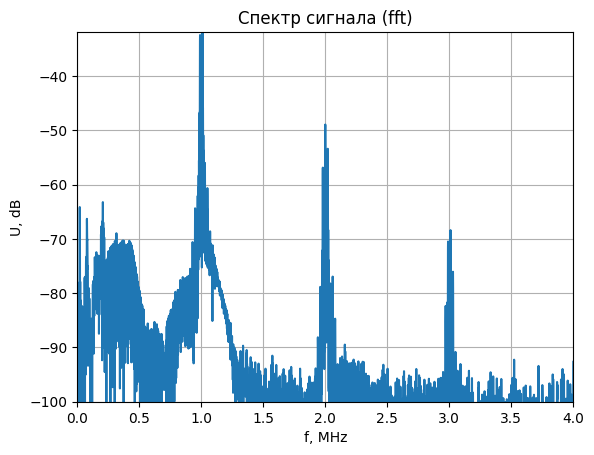

In [14]:
# !pip install scipy

from scipy.signal import periodogram

f_periodogram, P_periodogram = periodogram(s_arr, fs=fs, nfft=nsamp, scaling='density', return_onesided=True)
max_y = np.max(10 * np.log10(N * P_periodogram))

plt.figure()
plt.plot(f_periodogram / 1e6, 10 * np.log10(N * P_periodogram))
plt.xlabel("f, MHz")
plt.ylabel("U, dB")
plt.title("Спектр сигнала (fft)")
plt.xlim(0, 4)
plt.ylim(-100, max_y)
plt.grid(True)
plt.show()

## <span style="color: red;">Метод Уэлча</span>

Метод Уэлча - это модификация периодограммы, в которой:

* Сигнал разбивается на перекрывающиеся отрезки.

* К каждому отрезку применяется оконная функция (например, Ханна, Хэмминга) - это уменьшает эффект утечки спектра.

* Для каждого отрезка считается периодограмма.

* Результаты усредняются → снижается дисперсия.

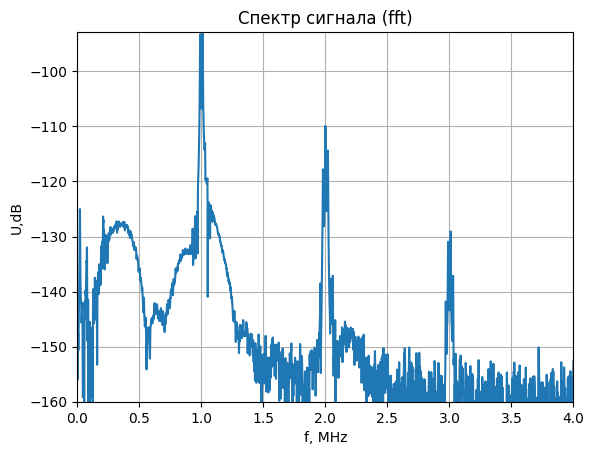

In [15]:
from scipy.signal import welch

f_welch, Pxx_welch = welch(np.array(s), fs=fs, nperseg=nsamp, scaling='density', return_onesided=True)
max_y = np.max(10 * np.log10(Pxx_welch))

plt.figure()
plt.plot(f_welch / 1e6, 10 * np.log10(Pxx_welch))
plt.xlabel("f, MHz")
plt.ylabel("U,dB")
plt.title("Спектр сигнала (fft)")
plt.xlim(0, 4)
plt.ylim(-160, max_y)
plt.grid(True)
plt.show()

# <span style="color: red;">Определение основной частоты сигнала</span>

Остановимся на оценке спектра методом Уэлча и проанализируем область низких частот (от 0 до 1500 Гц). Найдём **пики** в спектре - они соответствуют гармоникам сигнала. В этом нам поможет функция `findpeaks1d` из соответствующего пакета. Выделим первые шесть гармоник, и отобразим их на графике:

Индексы пиков: [3244 3309]
Частоты пиков: [ 989.99023437 1009.82666016] кГц
Амплитуды пиков: [-32.46246668 -31.92426117] дБ


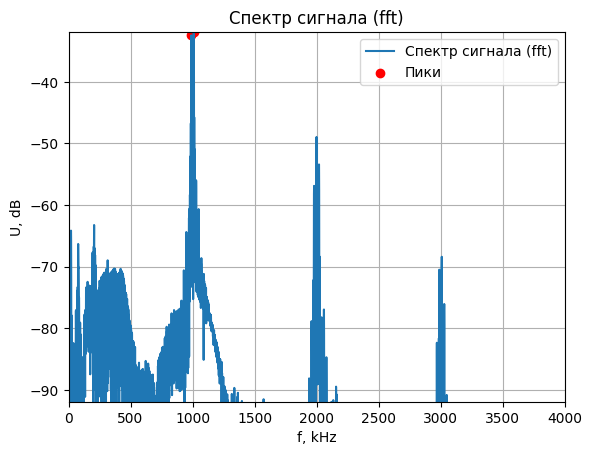

In [18]:
from plot_peaks_periodogram import plot_peaks_periodogram

p_test = P_periodogram
f_test = f_periodogram

plot_peaks_periodogram(N*p_test, f_test, freq_limit=4_000_000, height=-40)

Рассмотрим более внимательно спектр сигнала в рабочей области ППФ (в низких частотах)

Индексы пиков: [ 54  65  77 195 218 232 243 255 295 306]
Частоты пиков: [16.47949219 19.83642578 23.49853516 59.50927734 66.52832031 70.80078125
 74.15771484 77.81982422 90.02685547 93.38378906] кГц
Амплитуды пиков: [-117.23416626 -103.33803186 -117.07801028 -116.31629342 -116.13249731
 -113.08747473 -112.48071595 -105.50620042 -118.90050186 -118.27285644] дБ


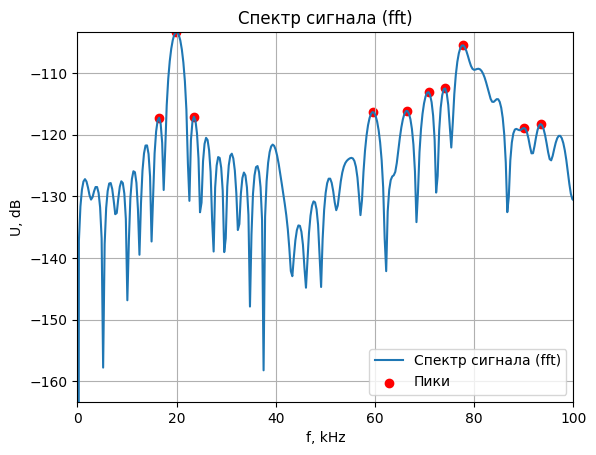

In [19]:
plot_peaks_periodogram(p_test, f_test, freq_limit=100_000, height=-120)

# <span style="color: red;">Считывание параметров ЗИ из файла *.dds</span>

Параметры ЗИ записаны в файле *.dds. Формат файла описан руководстве системного программиста [Гидра_DDS.14.pdf (стр.61)](../doc/Гидра_DDS.14.pdf#page=61):

In [ ]:
from reader_dds import reader_dds, print_info, plot_signal

fclk = 125e6  # частота тактирования ЦАП

mode = reader_dds(dds_file, fclk)
print_info(mode)
plot_signal(mode)

### <span style="color: red;">Фильтрация цифрового сигнала</span>

Синтезируем простой эллиптический фильтр нижних частот (ФНЧ), подавляющий частоты выше 360 Гц. Это позволит нам отсечь высшие гармоники. Отфильтруем исходный сигнал и прослушаем результат:

In [ ]:
from scipy.signal import ellip, sosfilt, sosfreqz

f_cutoff = 500_000

# Создание эллиптического фильтра нижних частот
sos = ellip(N=10,              # порядок фильтра
            rp=0.1,            # неравномерность в полосе пропускания (дБ)
            rs=60,             # подавление в полосе задерживания (дБ)
            Wn=f_cutoff / (fclk / 2),  # нормированная частота среза
            btype='low',
            output='sos')

# # Пример применения фильтра к сигналу
# s_after_flt = sosfilt(sos, s_arr)

Полезно оценить результат синтеза коэффициентов, визуализировав амплитудно-частотную (АЧХ) и фазо-частотную (ФЧХ) характеристики фильтра, а также его импульсную характеристику:

In [ ]:
from scipy.signal import sosfreqz

w, h = sosfreqz(sos, worN=f_cutoff, fs=fclk)
plt.figure()
plt.plot(w, 20 * np.log10(np.abs(h)), linewidth=3)
plt.title("АЧХ ФНЧ")
plt.xlabel("f, Hz")
plt.ylabel("Amplitude, dB")
plt.grid(True)
plt.show()

In [ ]:
from scipy.signal import sosfreqz

w, h = sosfreqz(sos, worN=f_cutoff, fs=fclk)
phi = np.angle(h)

plt.figure()
plt.plot(w, np.rad2deg(phi / 2), linewidth=3)
plt.title("ФЧХ ФНЧ")
plt.xlabel("f, Hz")
plt.ylabel("Phase, deg")
plt.grid(True)
plt.show()

Отфильтруем сигнал функцией `filt`, послушаем результат:

In [ ]:
from scipy.signal import sosfilt

s_after_flt = sosfilt(sos, mode.s)

plt.figure()
plt.plot(np.array(mode.t) * 1e6 - 1.5, mode.s, label="Сигнал из DDS")
plt.plot(np.array(mode.t) * 1e6 - 3, s_after_flt, label="Сигнал после фильтрации")
plt.plot(np.array(t) * 1e6, s, label="Осциллограмма сигнала")
plt.xlabel("Время, мкс")
plt.ylabel("Амплитуда")
plt.title("Сравнение сигналов")
plt.legend()
plt.grid(True)
plt.xlim(0, np.array(t)[-1] * 1e6 / oversampling_factor / 1.2)
plt.show()

Сравним спектры исходного и отфильтрованного сигнала:

In [ ]:
# # Welch periodogram for both signals
# f_welch_mode, Pxx_welch_mode = welch(mode.s, fs=fclk, nperseg=60000, scaling='density', return_onesided=True)
# f_welch_flt, Pxx_welch_flt = welch(s_after_flt, fs=fclk, nperseg=60000, scaling='density', return_onesided=True)

# Standard periodogram for both signals
f_pgram_mode, P_mode = periodogram(mode.s, fs=fclk, nfft=65000, scaling='density', return_onesided=True)
f_pgram_flt, P_flt = periodogram(s_after_flt, fs=fclk, nfft=65000, scaling='density', return_onesided=True)
f_osc, P_osc = periodogram(s_arr, fs=fs, nfft=nsamp, scaling='density', return_onesided=True)

plt.figure()
plt.plot(f_pgram_mode / 1e6, 10 * np.log10(P_mode), label="Исходный сигнал")
plt.plot(f_pgram_flt / 1e6, 10 * np.log10(P_flt), linewidth=3, label="После фильтрации")
plt.plot(f_osc / 1e6, 10 * np.log10(P_osc) + 23, linewidth=3, label="Реальный сигнал")
plt.xlabel("f, MHz")
plt.ylabel("U, dB")
plt.title("Спектр сигнала (fft)")
plt.xlim(0, 1)
plt.ylim(-100, -40)
plt.grid(True)
plt.legend()
plt.show()